In [31]:
nombre = "Madrigal Urencio Ricardo \n"

In [1]:
dir_hdfs = "hdfs://namenode:9000/tmp/amd/locatellimpio"

In [32]:
df = spark.read.csv(dir_hdfs, header = True, inferSchema = True)

print(nombre)
df.printSchema()

Madrigal Urencio Ricardo 

root
 |-- fecha_solicitud: date (nullable = true)
 |-- hora_solicitud: timestamp (nullable = true)
 |-- tema_solicitud: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- edad: double (nullable = true)
 |-- estatus: string (nullable = true)
 |-- alcaldia: string (nullable = true)
 |-- colonia_datos: string (nullable = true)
 |-- latitud: double (nullable = true)
 |-- longitud: double (nullable = true)
 |-- codigo_postal_solicitud: string (nullable = true)
 |-- d_codigo: integer (nullable = true)
 |-- D_mnpio: string (nullable = true)



In [4]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [6]:
df.createOrReplaceTempView("locatel")
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |  locatel|       true|
+---------+---------+-----------+



In [37]:
print(nombre)
spark.sql("describe locatel").show()

Madrigal Urencio Ricardo 

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|     fecha_solicitud|     date|   NULL|
|      hora_solicitud|timestamp|   NULL|
|      tema_solicitud|   string|   NULL|
|                sexo|   string|   NULL|
|                edad|   double|   NULL|
|             estatus|   string|   NULL|
|            alcaldia|   string|   NULL|
|       colonia_datos|   string|   NULL|
|             latitud|   double|   NULL|
|            longitud|   double|   NULL|
|codigo_postal_sol...|   string|   NULL|
|            d_codigo|      int|   NULL|
|             D_mnpio|   string|   NULL|
+--------------------+---------+-------+



In [8]:
spark.sql("select fecha_solicitud, edad, alcaldia from locatel").show(truncate = False)

+---------------+----+--------+
|fecha_solicitud|edad|alcaldia|
+---------------+----+--------+
|2021-01-03     |NULL|NA      |
|2021-01-10     |NULL|NA      |
|2021-01-16     |NULL|NA      |
|2021-01-20     |NULL|NA      |
|2021-01-24     |NULL|NA      |
|2021-01-28     |NULL|NA      |
|2021-02-05     |NULL|NA      |
|2021-02-08     |NULL|NA      |
|2021-02-08     |NULL|NA      |
|2021-02-09     |NULL|NA      |
|2021-02-14     |NULL|NA      |
|2021-02-15     |NULL|NA      |
|2021-02-16     |NULL|NA      |
|2021-02-18     |NULL|NA      |
|2021-02-19     |NULL|NA      |
|2021-02-23     |NULL|NA      |
|2021-03-01     |NULL|NA      |
|2021-03-10     |NULL|NA      |
|2021-03-15     |NULL|NA      |
|2021-03-17     |NULL|NA      |
+---------------+----+--------+
only showing top 20 rows



In [10]:
sqlstr = """select fecha_solicitud, edad, alcaldia
from locatel
where edad is not null
"""
spark.sql(sqlstr).show(truncate=False)

+---------------+----+-----------------+
|fecha_solicitud|edad|alcaldia         |
+---------------+----+-----------------+
|2021-02-14     |51.0|NA               |
|2021-01-01     |51.0|Tlalpan          |
|2021-01-03     |46.0|NA               |
|2021-01-04     |38.0|NA               |
|2021-01-04     |61.0|Tlalpan          |
|2021-01-05     |29.0|NA               |
|2021-01-06     |69.0|Cuauhtémoc       |
|2021-01-08     |58.0|NA               |
|2021-01-08     |57.0|NA               |
|2021-01-08     |35.0|NA               |
|2021-01-09     |70.0|Gustavo A. Madero|
|2021-01-09     |28.0|Monterrey        |
|2021-01-10     |80.0|NA               |
|2021-01-10     |39.0|Azcapotzalco     |
|2021-01-10     |40.0|Coyoacán         |
|2021-01-11     |53.0|Cuauhtémoc       |
|2021-01-11     |27.0|Azcapotzalco     |
|2021-01-11     |32.0|NA               |
|2021-01-12     |43.0|Tlalpan          |
|2021-01-12     |64.0|Cuauhtémoc       |
+---------------+----+-----------------+
only showing top

In [11]:
sqlstr = """select count(*) nr from locatel"""
spark.sql(sqlstr).show(truncate=False)

+-------+
|nr     |
+-------+
|2323089|
+-------+



In [12]:
#Número de registros por sexo

sqlstr = """select sexo, count(*) nr 
from locatel
group by sexo
order by sexo
"""
spark.sql(sqlstr).show(truncate=False)

+---------------+------+
|sexo           |nr    |
+---------------+------+
|FEMENINO       |829463|
|MASCULINO      |572469|
|NA             |566833|
|NO ESPECIFICADO|354324|
+---------------+------+



In [18]:
#Número de registros por edad
campo = "edad"

sqlstr = f"""select {campo}, count(*) nr 
from locatel
group by {campo}
order by {campo} desc
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

+-------+-------+
|edad   |nr     |
+-------+-------+
|16090.0|1      |
|100.0  |16     |
|99.0   |19     |
|98.0   |14     |
|97.0   |23     |
|96.0   |26     |
|95.0   |36     |
|94.0   |51     |
|93.0   |77     |
|92.0   |89     |
|91.0   |109    |
|90.0   |205    |
|89.0   |212    |
|88.0   |288    |
|87.0   |377    |
|86.0   |483    |
|85.0   |698    |
|84.0   |714    |
|83.0   |847    |
|82.0   |980    |
|81.0   |921    |
|80.0   |1886   |
|79.0   |1561   |
|78.0   |2256   |
|77.0   |2149   |
|76.0   |2473   |
|75.0   |3672   |
|74.0   |3508   |
|73.0   |4235   |
|72.0   |5584   |
|71.0   |5040   |
|70.0   |8485   |
|69.0   |6255   |
|68.0   |8204   |
|67.0   |7712   |
|66.0   |8215   |
|65.0   |13747  |
|64.0   |10512  |
|63.0   |11645  |
|62.0   |12744  |
|61.0   |11214  |
|60.0   |19332  |
|59.0   |12849  |
|58.0   |14613  |
|57.0   |13402  |
|56.0   |16732  |
|55.0   |18533  |
|54.0   |15646  |
|53.0   |15386  |
|52.0   |18477  |
|51.0   |15384  |
|50.0   |29459  |
|49.0   |1

In [33]:
#Número de registros por tema
campo = "tema_solicitud"

sqlstr = f"""select {campo}, count(*) nr 
from locatel
group by {campo}
order by nr desc 
limit 5
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)


Madrigal Urencio Ricardo 

+-------------------+------+
|tema_solicitud     |nr    |
+-------------------+------+
|OTRO               |303078|
|ALUMBRADO          |259590|
|PODA / RETIRO ARBOL|214579|
|FALTA DE AGUA      |205785|
|FUGA DE AGUA       |109632|
+-------------------+------+



In [38]:
#Edad por campo
campo = "tema_solicitud"

sqlstr = f"""select {campo}, round(avg(edad), 2) edad_prom,
max(edad) edad_max, min(edad) edad_min, count(*) nr
from locatel
group by {campo}
order by {campo}
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+------------------------------------+---------+--------+--------+------+
|tema_solicitud                      |edad_prom|edad_max|edad_min|nr    |
+------------------------------------+---------+--------+--------+------+
|AGUA POTABLE Y SERVICIOS HIDRÁULICOS|42.73    |96.0    |0.0     |17573 |
|ALARMAS VECINALES                   |44.42    |87.0    |0.0     |1410  |
|ALERTA SISMICA                      |40.62    |99.0    |0.0     |44182 |
|ALUMBRADO                           |42.76    |100.0   |0.0     |259590|
|ANUNCIOS                            |38.95    |90.0    |0.0     |848   |
|APOYO SERVICIOS FUNERARIOS          |43.41    |73.0    |0.0     |164   |
|ASESORIAS                           |39.17    |97.0    |0.0     |7489  |
|ASESORÍA DE TERCEROS ACREDITADOS    |40.55    |62.0    |1.0     |407   |
|ASESORÍA JURÍDICA                   |39.8     |95.0    |0.0     |3522  |
|ASISTENCIA SOCIAL                   |41.41    |98.0    |0.0     |17254 |
+----------

In [39]:
#Edad por campo
campo = "sexo"

sqlstr = f"""select {campo}, round(avg(edad), 2) edad_prom,
max(edad) edad_max, min(edad) edad_min, count(*) nr
from locatel
group by {campo}
order by {campo}
"""
print(nombre)
spark.sql(sqlstr).show(10, truncate=False)

Madrigal Urencio Ricardo 

+---------------+---------+--------+--------+------+
|sexo           |edad_prom|edad_max|edad_min|nr    |
+---------------+---------+--------+--------+------+
|FEMENINO       |36.33    |16090.0 |0.0     |829463|
|MASCULINO      |43.39    |100.0   |0.0     |572469|
|NA             |NULL     |NULL    |NULL    |566833|
|NO ESPECIFICADO|46.36    |100.0   |0.0     |354324|
+---------------+---------+--------+--------+------+



In [52]:
#Numero de registros por hora
campo = "hora"

sqlstr = f"""select HOUR(hora_solicitud) hora, count(*) nr
from locatel
group by HOUR(hora_solicitud)
order by 1
"""
print(nombre)
spark.sql(sqlstr).show(24, truncate=False)

Madrigal Urencio Ricardo 

+----+-------+
|hora|nr     |
+----+-------+
|0   |2323089|
+----+-------+



Madrigal Urencio Ricardo 

La grafica no arupa las horas correctamente


Text(0.5, 1.0, 'Numero de registros por hora')

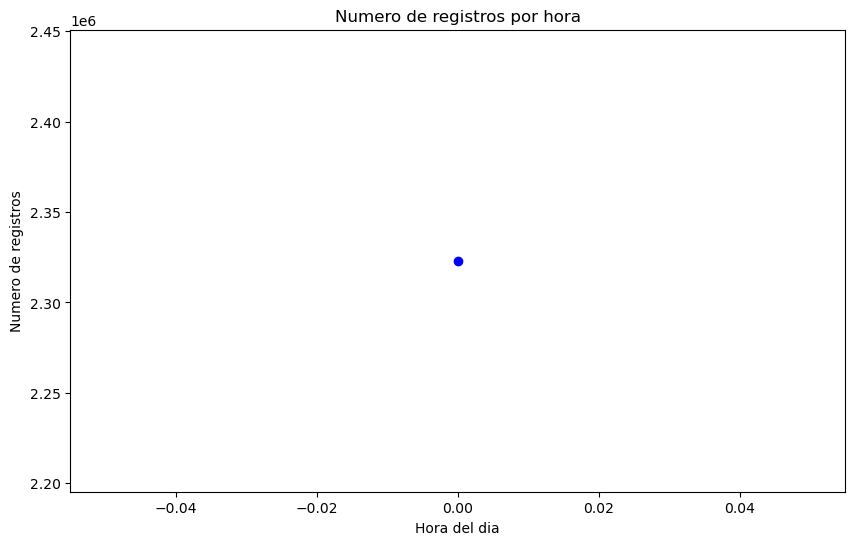

In [61]:
import matplotlib.pyplot as plt

sqlstr = f"""select HOUR(hora_solicitud) as hora, count(*) nr
from locatel
group by hora
order by 1
"""
print(nombre)
print("La grafica no arupa las horas correctamente")
dfh = spark.sql(sqlstr).toPandas()
plt.figure(figsize = (10, 6))
#plt.bar(dfh['hora'], dfh['nr'])
plt.plot(dfh ['hora'], dfh['nr'], marker = 'o', linestyle = '-', color = 'b')

plt.xlabel('Hora del dia')
plt.ylabel('Numero de registros')
plt.title('Numero de registros por hora')